<a href="https://colab.research.google.com/github/patilhrishikesh/machine_learning_projects/blob/main/iris_classification_project/Iris_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
#Loading datasets from sklearn dataset library
from sklearn.datasets import load_iris
# To split data into train and test purpose
from sklearn.model_selection import train_test_split
#For building our classification model
from sklearn.linear_model import LogisticRegression
#for evaluating our model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

**Loading the dataset**


In [6]:
#the iris data is conveniently available directly from sickit-learn
#Load the iris dataset
iris = load_iris()

# The 'iris' object is a Bunch object (dictionary-like).
# It contains:
# - data: The feature matrix (X)
# - target: The target vector (y)
# - feature_names: Names of the features
# - target_names: Names of the target classes (species)
# - DESCR: A description of the dataset

#let's what's inside.
print("keys of iris dataset:", iris.keys())
print("\nfeatures names:", iris.feature_names)
print("Target Names: ", iris.target_names)
print("\nshape of data (sample, features):", iris.data.shape)
print("shape of target (samples) :", iris.target.shape)


keys of iris dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

features names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names:  ['setosa' 'versicolor' 'virginica']

shape of data (sample, features): (150, 4)
shape of target (samples) : (150,)


**Exploratory Data Analysis(EDA)**

In [8]:
#It's crucial to understand your data before applying any algorithm or building the model.
# we'll convert this into dataframe using the pandas for better data manipulation.
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
#Adding target variable to the df.
df['species'] = iris.target
#replace numerical target with actual names
df['species_name'] = df['species'].apply(lambda x: iris.target_names[x])
df.head()
print("\nBasic statistical summary:")
print(df.describe())
print("\nNumber of samples per species:")
print(df['species_name'].value_counts())


Basic statistical summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Number of samples per species:
species_name

<Figure size 1000x800 with 0 Axes>

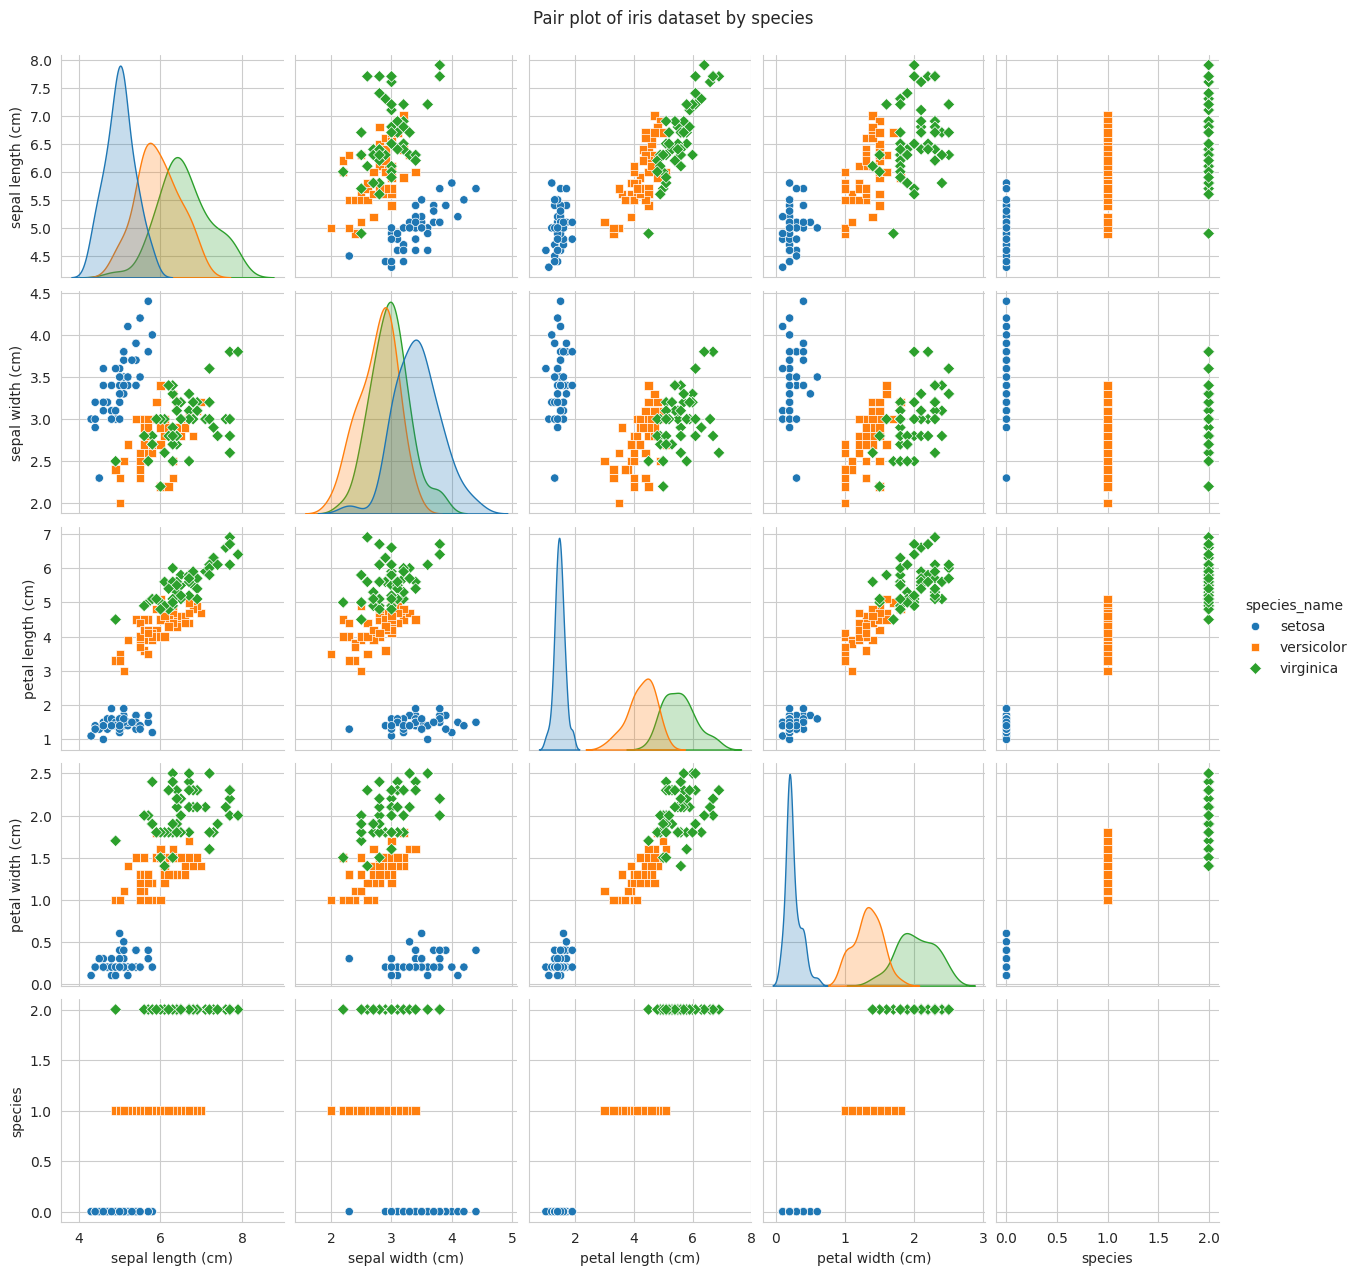

In [16]:
plt.figure(figsize=(10,8))
sns.pairplot(df, hue='species_name', markers=["o","s","D"])
plt.suptitle("Pair plot of iris dataset by species", y=1.02)
plt.show()

**Split data into train and test**

In [19]:
# X will contain our features
X = iris.data

# y will contain our target
y = iris.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (150, 4)
Target (y) shape: (150,)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [77]:
print("\nDistribution of species in training set:")
unique_train, counts_test = np.unique(y_train, return_counts=True)
print(dict(zip(iris.target_names[unique_train], counts_test)))
print("-"*30)
print(unique_train, counts_test)


Distribution of species in training set:
{np.str_('setosa'): np.int64(40), np.str_('versicolor'): np.int64(40), np.str_('virginica'): np.int64(40)}
------------------------------
[0 1 2] [40 40 40]


In [78]:
print("\nDistribution of species in test set:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(dict(zip(iris.target_names[unique_test], counts_test)))
print("-" *30)
print(unique_test, counts_test)


Distribution of species in test set:
{np.str_('setosa'): np.int64(10), np.str_('versicolor'): np.int64(10), np.str_('virginica'): np.int64(10)}
------------------------------
[0 1 2] [10 10 10]


**Model Selection**

In [82]:
from sklearn.neighbors import KNeighborsClassifier
# model = LogisticRegression(solver='liblinear', random_state=42)
# print("Model selected : Logistic Regression\n", model, end = " ")
model_two = KNeighborsClassifier(n_neighbors=3) #gives me 100% accuracy

**Model Training**

In [83]:
#Training the model using training data.
model_two.fit(X_train, y_train)
print("Model Training Complete!")

Model Training Complete!


**Model Evaluation**

In [84]:
#Making prediction on unseen means test data
y_pred = model_two.predict(X_test)
print("Predictions on test set made")
print(y_pred)
#Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy:.4f}")

Predictions on test set made
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]

Accuracy of the model: 1.0000



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


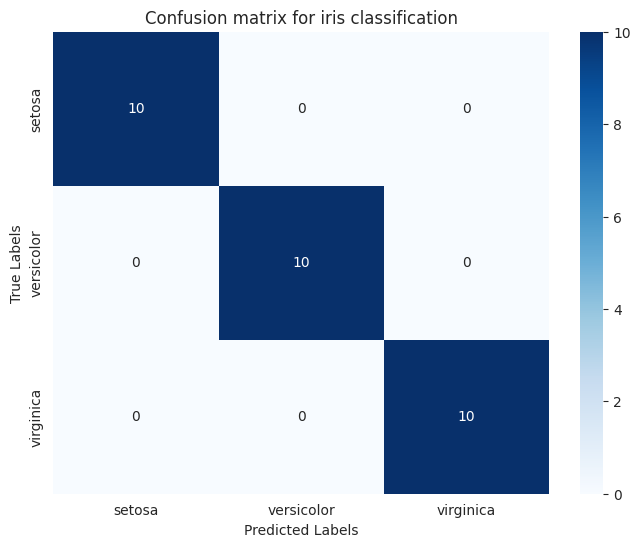

In [65]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(
  "Confusion matrix for iris classification"
)
plt.show()


**Making Predictions on New Data**

In [59]:
new_flower_measurements = np.array([[5.0, 3.5, 1.3, 0.2]])
# Make a prediction
predicted_species_numerical = model.predict(new_flower_measurements)

# Get the actual species name
predicted_species_name = iris.target_names[predicted_species_numerical[0]]

In [60]:
print(predicted_species_numerical)
print(predicted_species_name)

[0]
setosa
